# Proyecto de Python - Física Computacional I

### Camilo Gómez Zapata - C.C. 1010088965

## Introducción

El objetivo de este proyecto hacer un análisis de las autofunciones y autovalores correspondientes a la ecuación de Schrödinger para diferentes tipos de potenciales. En específico, se quiere analizar el potencial de pozo finito, el potencial de pozo infinito y el potencial de oscilador armónico, y graficar cómo se comportan estas soluciones.

## Desarrollo

En el artículo está un poco más detallado cómo funciona el código, pero en resumen se tienen los tres potenciales en forma de funciones y se tiene una clase `Analyser` que ejecuta toda la lógica. Cuando esta clase es llamada, recibe de argumento la función del potencial. Después de esto, cada uno de los métodos que tiene corresponde a cada uno de los items del trabajo, en orden, todo según el potencial pasado.

El primer método `create_eigenvals_and_eigenfuncs` calcula los autovalores y guarda las autofunciones dependiendo del tipo de potencial que se halla pasado. Eso lo hace con un condicional ya que tanto las autofunciones como los autovalores dependen de diferentes formas matemáticas que se hallan analíticamente.

El segundo método `graph_eigenfuncs` grafica las primeras cuatro autofunciones para un rango de $z$.

El tercer método `graph_prob_densities` grafica las densidades de probabilidad correspondiente a cada autofunción.

El cuarto método `create_sol_dependant_on_time` crea las funciones dependientes del tiempo, usando el coeficiente $c_n=0.5$ para todas ya que la suma de los $c_n^2$ así daría 1.

El quinto método `graph_prob_density_for_times` grafica las densidades de probabilidades totales para diferentes tiempos, que toma de entrada.

In [1]:
import numpy as np
from scipy.optimize import root
import matplotlib.pyplot as plt
from scipy.special import hermite

hbar = 1

def potential_finite_well(z, a, V0):
    if abs(z) < a/2:
        return 0
    else:
        return V0

def potential_infinite_well(z, a):
    if abs(z) < a/2:
        return 0
    else:
        return np.nan

def potential_oscillator(z):
    return z**2

class Analyser:
    def __init__(self, potential):
        self.potential = potential
    
    def create_eigenvals_and_eigenfuncs(self, m, a, V0, w):

        # PRIMERO EL CASO DEL POTENCIAL DE POZO FINITO

        if self.potential == potential_finite_well:
            # Esta primera parte es el optimizador que usa scipy.optimize.root
            # para encontrar los ceros de las ecuaciones trascendentales que están
            # entre 0 y 10.
            u0_sqr = m*a**2*V0/(2*hbar**2)
            sym_func = lambda v: (u0_sqr-v**2)**0.5 - v*np.tan(v)
            asym_func = lambda v: (u0_sqr-v**2)**0.5 + v/np.tan(v)

            vi_list = []
            possible_roots = np.linspace(0, 10, 100)
            for possible_root in possible_roots:
                sol1 = root(sym_func, [possible_root])
                if sol1.success and round(sol1.x[0], 2) not in vi_list:
                    vi_list.append(round(sol1.x[0], 2))
                sol2 = root(asym_func, [possible_root])
                if sol2.success and round(sol2.x[0], 2) not in vi_list:
                    vi_list.append(round(sol2.x[0], 2))

            # Habiendo encontrado los ceros que son los vi, estos se ponen en orden
            # y se convierten en los autovalores E_i.
            vi_list.sort()
            self.eigenvals = [2*hbar**2*vi**2/(m*a**2) for vi in vi_list]

            # Y ahora se definen las autofunciones. Cada una tiene su propias constantes
            # por lo que se calculan adentro, y las funciones son por tramos y por esto
            # están compuestas de ifs. eigenfunc0 y eigenfunc2 son simétricas, y 
            # eigenfunc1 y eigenfunc3 son antisimétricas:

            self.eigenfuncs = []

            def eigenfunc0(z):
                k = (2*m*self.eigenvals[0])**0.5/hbar
                alpha = (2*m*(V0-self.eigenvals[0]))**0.5/hbar
                G = 1
                B = G*np.exp(-alpha*a/2)/np.cos(k*a/2)
                if z < -a/2:
                    return G*np.exp(alpha*z)
                elif -a/2 <= z and z <= a/2:
                    return B*np.cos(k*z)
                elif z > a/2:
                    return G*np.exp(-alpha*z)
            self.eigenfuncs.append(eigenfunc0)

            def eigenfunc1(z):
                k = (2*m*self.eigenvals[1])**0.5/hbar
                alpha = (2*m*(V0-self.eigenvals[1]))**0.5/hbar
                G = 1
                A = -G*np.exp(-alpha*a/2)/np.sin(k*a/2)
                if z < -a/2:
                    return G*np.exp(alpha*z)
                elif -a/2 <= z and z <= a/2:
                    return A*np.sin(k*z)
                elif z > a/2:
                    return -G*np.exp(-alpha*z)
            self.eigenfuncs.append(eigenfunc1)

            def eigenfunc2(z):
                k = (2*m*self.eigenvals[2])**0.5/hbar
                alpha = (2*m*(V0-self.eigenvals[2]))**0.5/hbar
                G = 1
                B = G*np.exp(-alpha*a/2)/np.cos(k*a/2)
                if z < -a/2:
                    return G*np.exp(alpha*z)
                elif -a/2 <= z and z <= a/2:
                    return B*np.cos(k*z)
                elif z > a/2:
                    return G*np.exp(-alpha*z)
            self.eigenfuncs.append(eigenfunc2)

            def eigenfunc3(z):
                k = (2*m*self.eigenvals[3])**0.5/hbar
                alpha = (2*m*(V0-self.eigenvals[3]))**0.5/hbar
                G = 1
                A = -G*np.exp(-alpha*a/2)/np.sin(k*a/2)
                if z < -a/2:
                    return G*np.exp(alpha*z)
                elif -a/2 <= z and z <= a/2:
                    return A*np.sin(k*z)
                elif z > a/2:
                    return -G*np.exp(-alpha*z)
            self.eigenfuncs.append(eigenfunc3)
        
        # SEGUNDO EL CASO DEL POTENCIAL DE POZO INFINITO (MUCHO MÁS SIMPLE)
            
        elif self.potential == potential_infinite_well:
            self.eigenvals = [n**2*np.pi**2*hbar**2/(2*m*a**2) for n in [1, 2, 3, 4]]

            self.eigenfuncs = []
            self.eigenfuncs.append(lambda z: np.sin(1*np.pi*(z+a/2)/a) if abs(z) < a/2 else 0)
            self.eigenfuncs.append(lambda z: np.sin(2*np.pi*(z+a/2)/a) if abs(z) < a/2 else 0)
            self.eigenfuncs.append(lambda z: np.sin(3*np.pi*(z+a/2)/a) if abs(z) < a/2 else 0)
            self.eigenfuncs.append(lambda z: np.sin(4*np.pi*(z+a/2)/a) if abs(z) < a/2 else 0)

        # TERCERO EL CASO DEL POTENCIAL DE OSCILADOR ARMÓNICO
        
        elif self.potential == potential_oscillator:
            self.eigenvals = [hbar*w*(n + 0.5) for n in [0, 1, 2, 3]]
            self.eigenfuncs = []

            n0 = 0
            self.eigenfuncs.append(
                lambda z:
                    1/(2**n0*np.math.factorial(n0))**0.5  * \
                    (m*w/(np.pi*hbar))**0.25 * \
                    np.exp(-m*w*z**2/(2*hbar)) * \
                    hermite(n0, True)((m*w/hbar)**0.5*z) 
            )
            n1 = 1
            self.eigenfuncs.append(
                lambda z:
                    1/(2**n1*np.math.factorial(n1))**0.5  * \
                    (m*w/(np.pi*hbar))**0.25 * \
                    np.exp(-m*w*z**2/(2*hbar)) * \
                    hermite(n1, True)((m*w/hbar)**0.5*z) 
            )
            n2 = 2
            self.eigenfuncs.append(
                lambda z:
                    1/(2**n2*np.math.factorial(n2))**0.5  * \
                    (m*w/(np.pi*hbar))**0.25 * \
                    np.exp(-m*w*z**2/(2*hbar)) * \
                    hermite(n2, True)((m*w/hbar)**0.5*z) 
            )
            n3 = 3
            self.eigenfuncs.append(
                lambda z:
                    1/(2**n3*np.math.factorial(n3))**0.5  * \
                    (m*w/(np.pi*hbar))**0.25 * \
                    np.exp(-m*w*z**2/(2*hbar)) * \
                    hermite(n3, True)((m*w/hbar)**0.5*z) 
            )
            
    
    def graph_eigenfuncs(self, z_start, z_end, graph_well=True):
        z_arr = np.linspace(z_start, z_end, 1000)

        plt.figure(figsize=(16, 20))

        for i in range(len(self.eigenfuncs)):
            psi_arr = [self.eigenfuncs[i](z) for z in z_arr]

            plt.subplot(4,1,i+1).set_title("Función de onda para energía E_{}={:.2f}".format(i+1, self.eigenvals[i]))
            plt.plot(z_arr, psi_arr, label="Función de onda")
            if graph_well:
                plt.axvline(-0.5, color="r", label="Barrera de potencial")
                plt.axvline(0.5, color="r")
            plt.legend()
            plt.ylabel("Psi(z)")
            plt.xlabel("z")
            plt.grid()
        
        plt.show()
    
    def graph_prob_densities(self, z_start, z_end, graph_well=True):
        z_arr = np.linspace(z_start, z_end, 1000)

        plt.figure(figsize=(16, 20))

        for i in range(len(self.eigenfuncs)):
            psi_arr = [self.eigenfuncs[i](z)**2 for z in z_arr]

            plt.subplot(4,1,i+1).set_title("Distribución de probabilidad para energía E_{}={:.2f}".format(i+1, self.eigenvals[i]))
            plt.plot(z_arr, psi_arr, label="Distribución de probabilidad")
            if graph_well:
                plt.axvline(-0.5, color="r", label="Barrera de potencial")
                plt.axvline(0.5, color="r")
            plt.legend()
            plt.ylabel("Rho(z)")
            plt.xlabel("z")
            plt.grid()

        plt.show()
    
    def create_sol_dependant_on_time(self):
        def psi_t(z, t):
            val = 0
            for i, eigenfunc in enumerate(self.eigenfuncs):
                # Se están tomando todos los coeficiente c_i como 0.5 para que la
                # suma de sus cuadrados sea 1.
                val += 0.5*eigenfunc(z)*np.exp(-self.eigenvals[i]*t*1j/hbar)
            
            return val
        
        self.psi_t = psi_t
    
    def graph_prob_density_for_times(self, z_start, z_end, times, graph_well=True):
        z_arr = np.linspace(z_start, z_end, 1000)

        plt.figure(figsize=(16, 20))

        for i, t in enumerate(times):
            psi_arr = [abs(self.psi_t(z, t))**2 for z in z_arr]

            plt.subplot(len(times),1,i+1).set_title("Distribución de probabilidad total para tiempo t={:.2f}s".format(t))
            plt.plot(z_arr, psi_arr, label="Distribución de probabilidad")
            if graph_well:
                plt.axvline(-0.5, color="r", label="Barrera de potencial")
                plt.axvline(0.5, color="r")
            plt.legend()
            plt.ylabel("Rho(z, t)")
            plt.xlabel("z")
            plt.grid()

        plt.show()


Habiendo definido la clase se ejecutan los puntos:

### 1. Definir autovalores y autofunciones:

Se pueden ignorar las warnings que corresponden a la búsqueda de ceros de las ecuaciones trascendentales:

In [2]:
analyser = Analyser(potential_finite_well)
analyser.create_eigenvals_and_eigenfuncs(1, 1, 60, 0)

for i in range(len(analyser.eigenvals)):
    print("El autovalor correspondiente a E_{} es {:.2f}".format(i+1, analyser.eigenvals[i]))

El autovalor correspondiente a E_1 es 3.54
El autovalor correspondiente a E_2 es 13.94
El autovalor correspondiente a E_3 es 30.73
El autovalor correspondiente a E_4 es 51.82


<ipython-input-1-e45b3d3ef759>:36: RuntimeWarning: invalid value encountered in sqrt
  sym_func = lambda v: (u0_sqr-v**2)**0.5 - v*np.tan(v)
<ipython-input-1-e45b3d3ef759>:37: RuntimeWarning: invalid value encountered in true_divide
  asym_func = lambda v: (u0_sqr-v**2)**0.5 + v/np.tan(v)
<ipython-input-1-e45b3d3ef759>:37: RuntimeWarning: invalid value encountered in sqrt
  asym_func = lambda v: (u0_sqr-v**2)**0.5 + v/np.tan(v)


### 2. Graficar autofunciones

Se grafican entre $z=-1$ y $z=1$

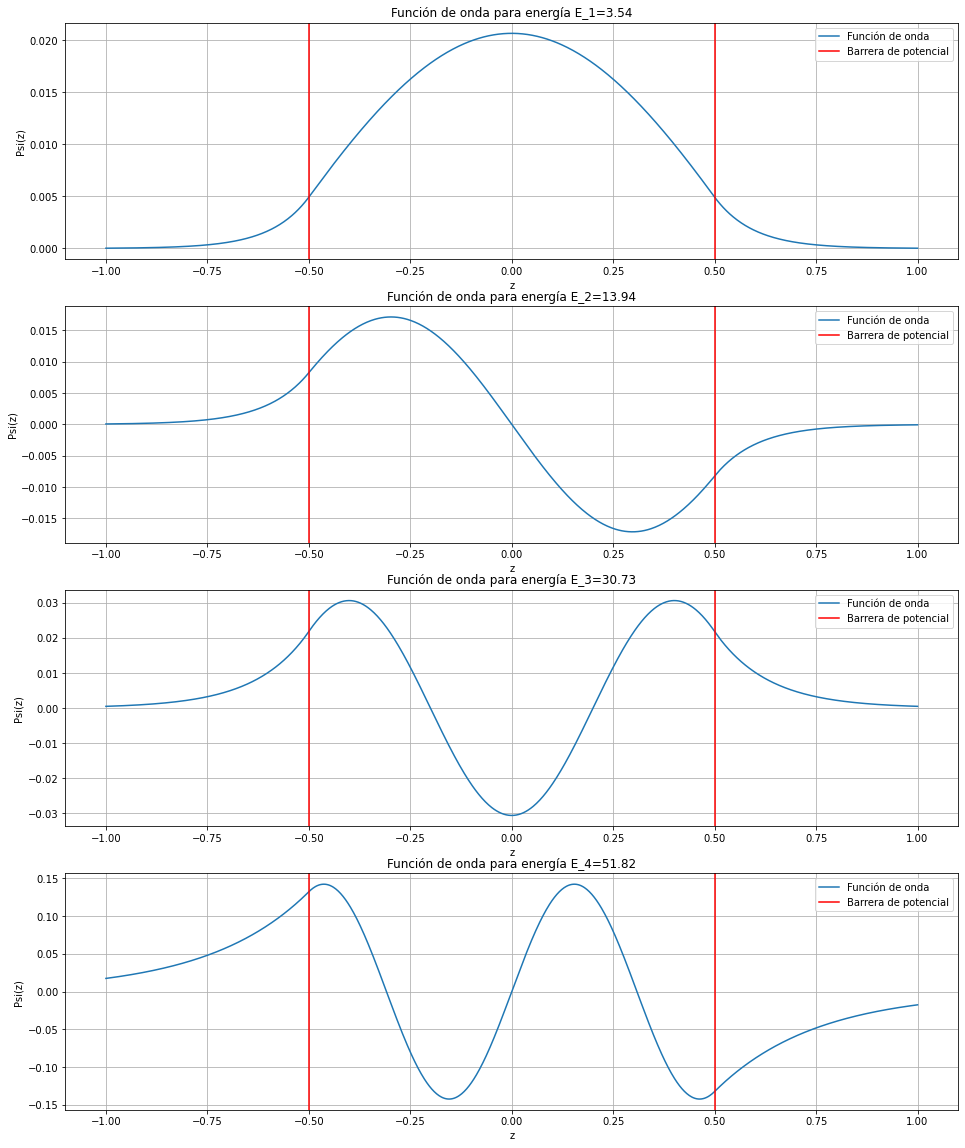

In [3]:
analyser.graph_eigenfuncs(-1, 1)

### 3. Graficar densidades de probabilidad

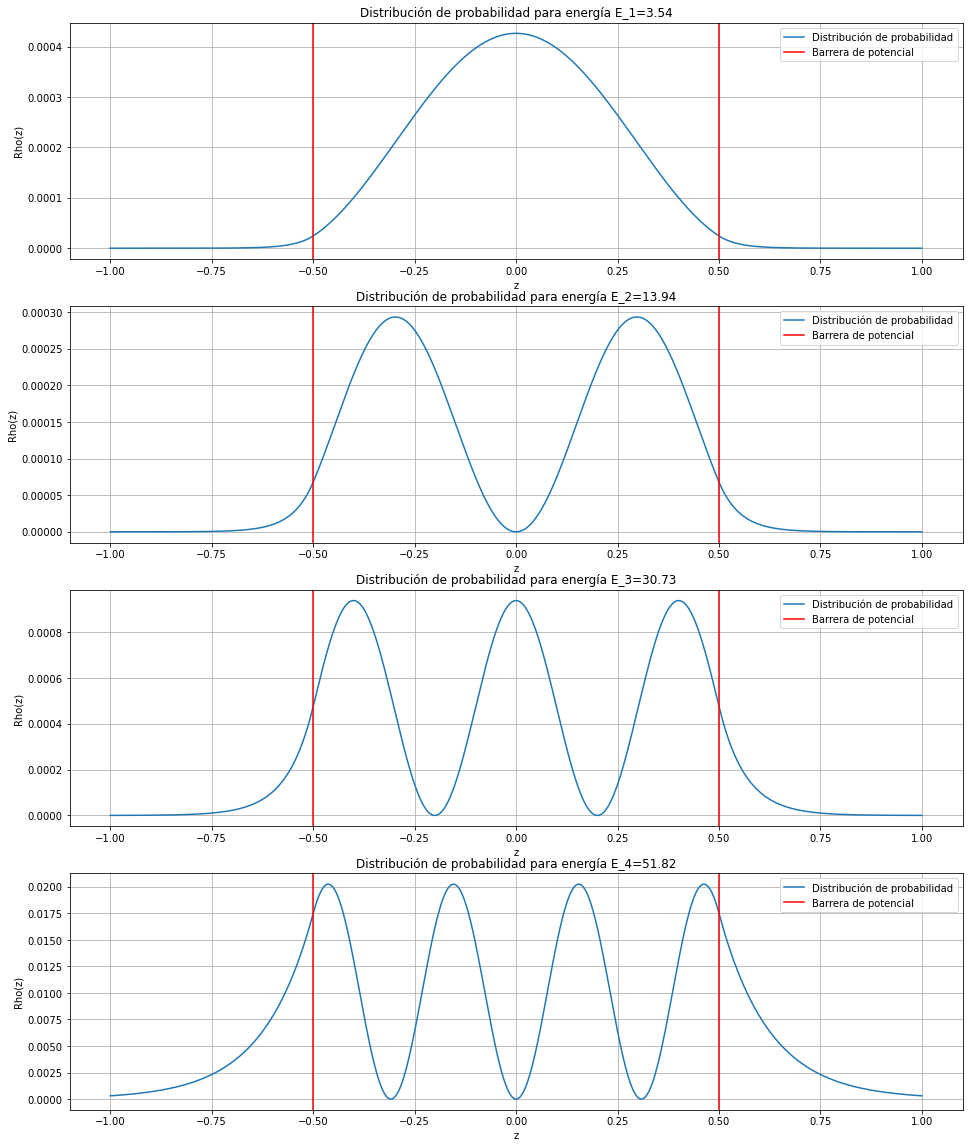

In [4]:
analyser.graph_prob_densities(-1, 1)

### 4. y 5. Construir la solución dependiente del tiempo y graficarla

Se toman los tiempos $t=1.0s, 2.0s, 3.0s, 4.0s$

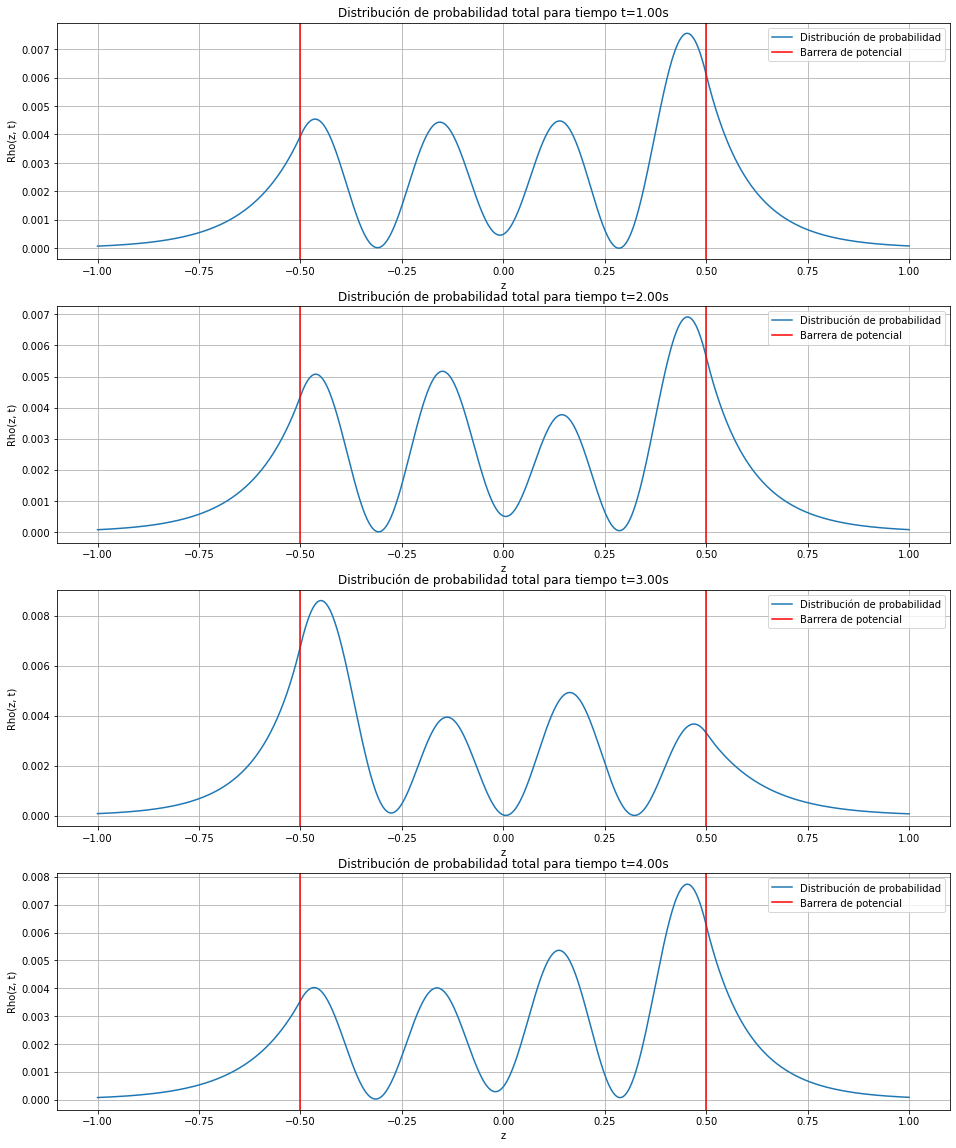

In [5]:
analyser.create_sol_dependant_on_time()
analyser.graph_prob_density_for_times(-1, 1, [1, 2, 3, 4])

### 6. Lo mismo para el pozo de potencial de paredes infinitas

#### 6.1 Autovalores y autofunciones del pozo infinito

In [6]:
analyser = Analyser(potential_infinite_well)
analyser.create_eigenvals_and_eigenfuncs(1, 1, 0, 0)

for i in range(len(analyser.eigenvals)):
    print("El autovalor correspondiente a E_{} es {:.2f}".format(i+1, analyser.eigenvals[i]))

El autovalor correspondiente a E_1 es 4.93
El autovalor correspondiente a E_2 es 19.74
El autovalor correspondiente a E_3 es 44.41
El autovalor correspondiente a E_4 es 78.96


#### 6.2 Gráficas de autofunciones del pozo infinito

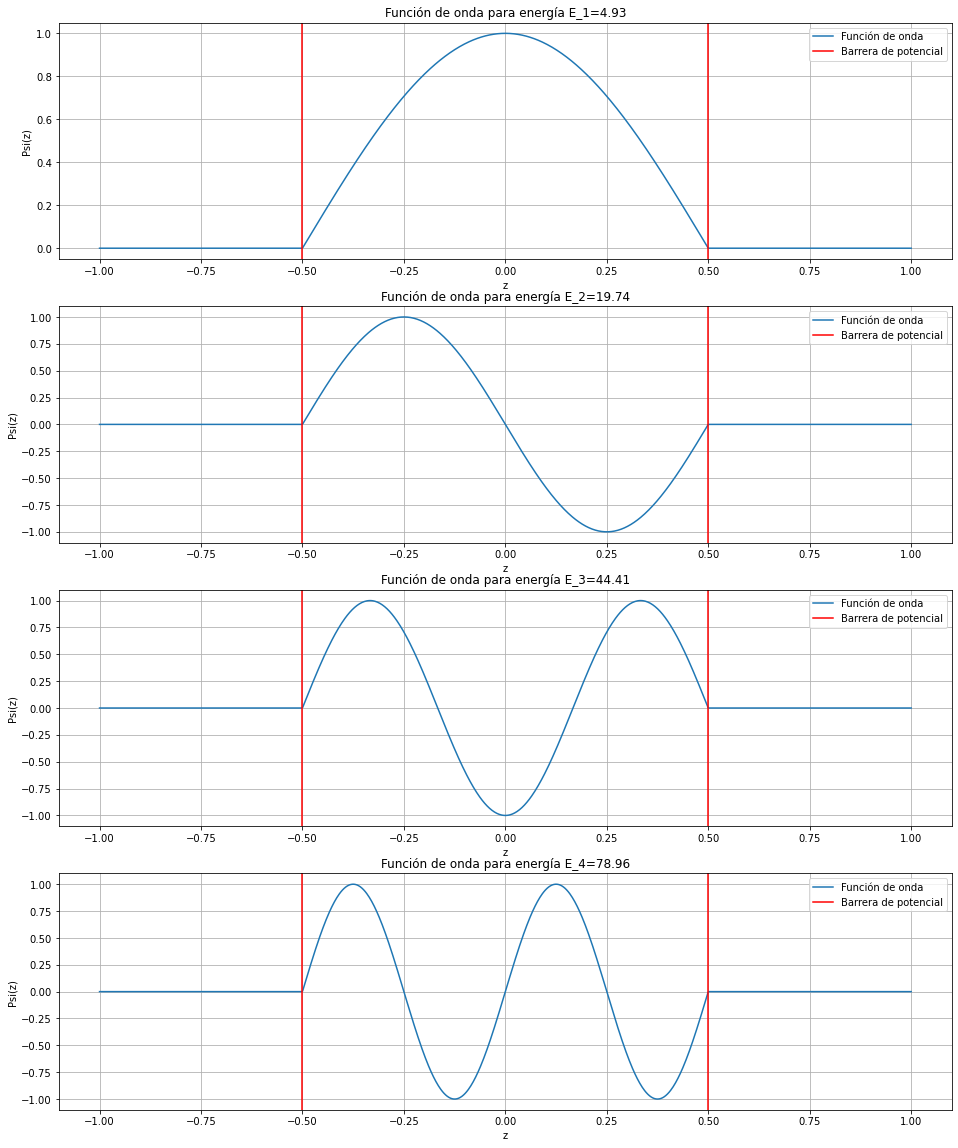

In [7]:
analyser.graph_eigenfuncs(-1, 1)

#### 6.3 Gráficas de densidades de probabilidad del pozo infinito

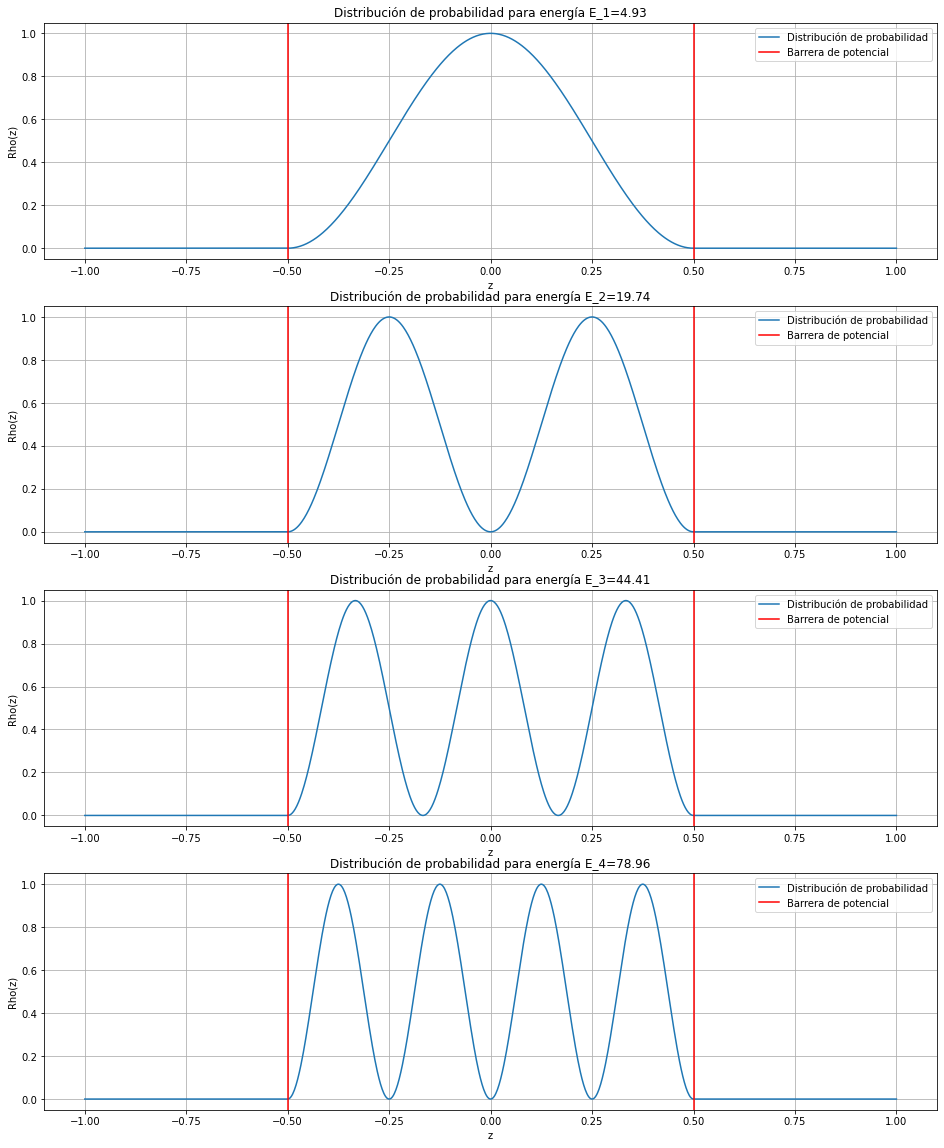

In [8]:
analyser.graph_prob_densities(-1, 1)

#### 6.4 y 6.5. Construir la solución dependiente del tiempo y graficarla para el pozo infinito

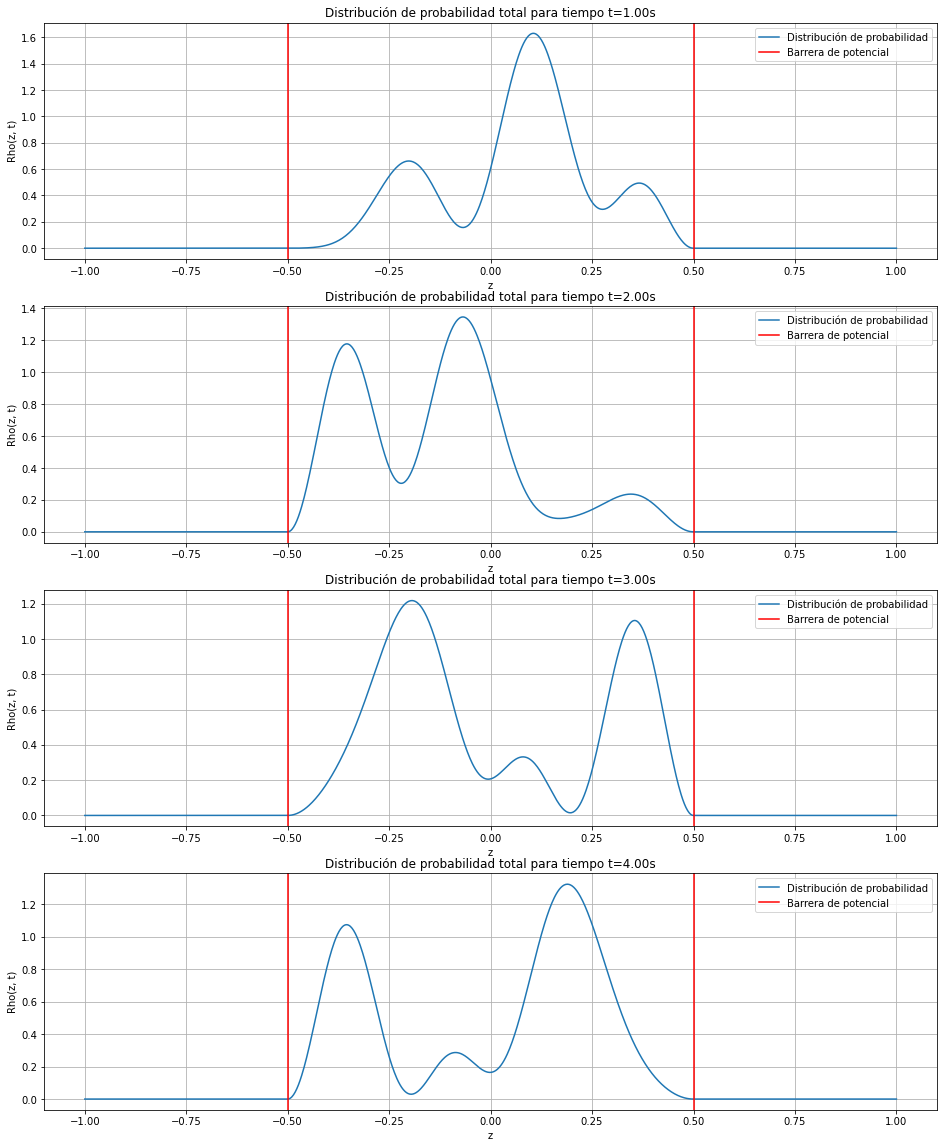

In [9]:
analyser.create_sol_dependant_on_time()
analyser.graph_prob_density_for_times(-1, 1, [1, 2, 3, 4])

### BONO

Ahora se hace lo mismo pero para el potencial de oscilador armónico.

#### BONO.1 Definir autovalores y autofunciones del potencial armónico

In [10]:
analyser = Analyser(potential_oscillator)
analyser.create_eigenvals_and_eigenfuncs(1, 1, 60, 1)

for i in range(len(analyser.eigenvals)):
    print("El autovalor correspondiente a E_{} es {:.2f}".format(i+1, analyser.eigenvals[i]))

El autovalor correspondiente a E_1 es 0.50
El autovalor correspondiente a E_2 es 1.50
El autovalor correspondiente a E_3 es 2.50
El autovalor correspondiente a E_4 es 3.50


#### BONO.2 Graficar autofunciones del potencial armónico

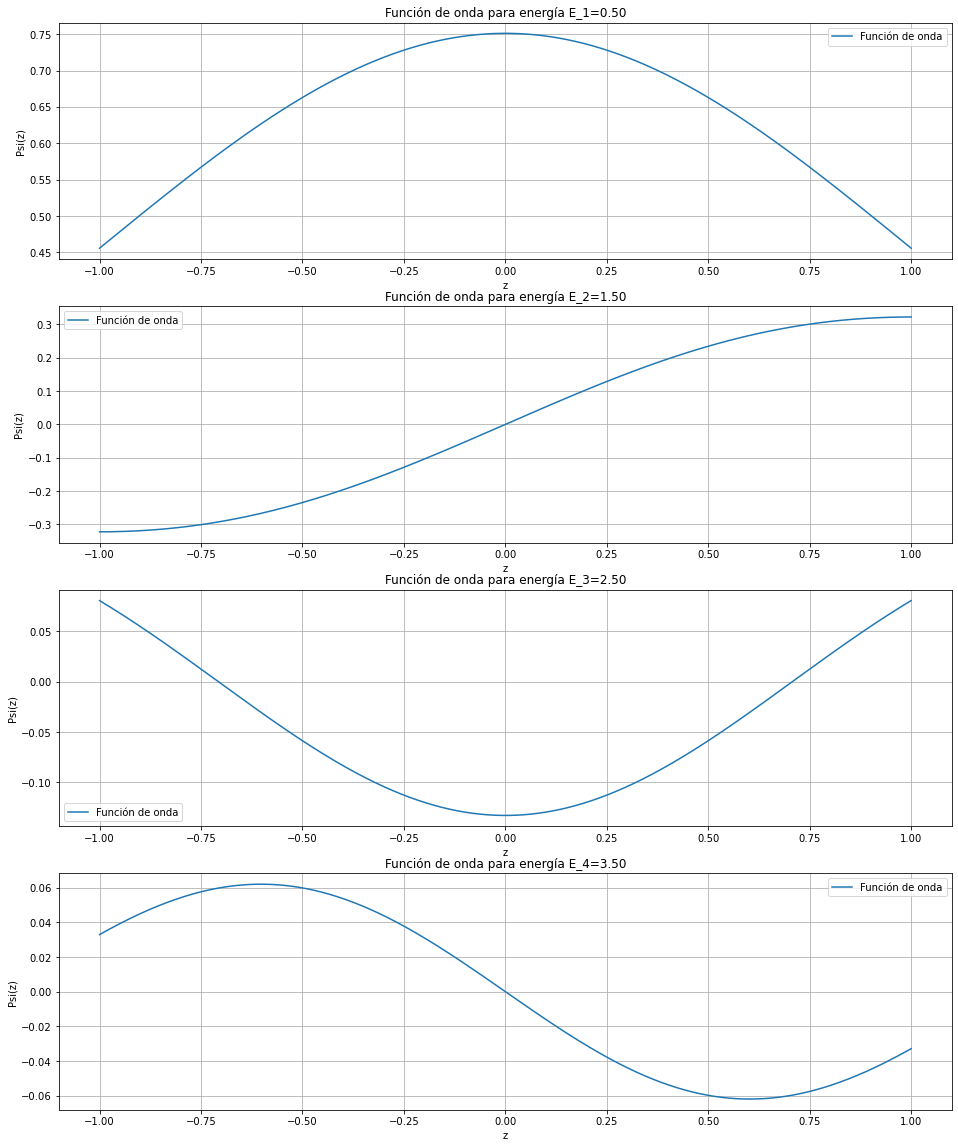

In [11]:
analyser.graph_eigenfuncs(-1, 1, graph_well=False)

#### BONO.3 Graficar densidades de probabilidad del potencial armónico

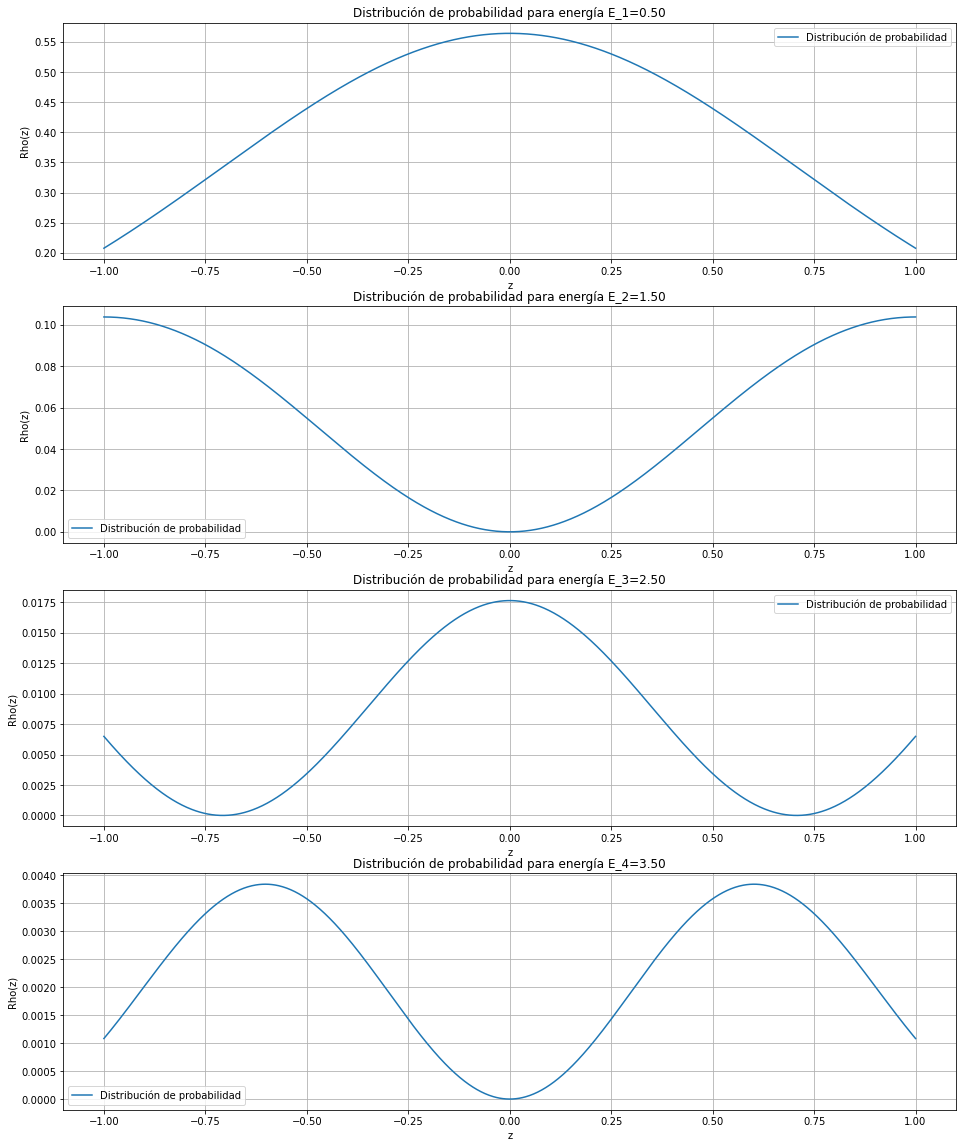

In [12]:
analyser.graph_prob_densities(-1, 1, graph_well=False)